In [1]:
library(nlme)
library(MASS)
library(multilevel)
library(readr)

In [2]:
datos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_con_códigos.csv',skip=0, col_names=TRUE)
datos_corregidos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_corregidos.csv',skip=0, col_names=TRUE)

Parsed with column specification:
cols(
  .default = col_double(),
  `p1 genero` = col_character(),
  `p2 dependencia` = col_character(),
  `p4 profesion` = col_character(),
  `p5 genero-director` = col_character(),
  `p6 genero-utp` = col_character(),
  `p7genero-inspector` = col_character(),
  `p22  requisito-centroestudiante` = col_character(),
  `p23 postulacion-centroestudiantes` = col_character(),
  `p24 eleccion-centroestudiante` = col_character(),
  `p26 relacion-director-estudiante` = col_character(),
  `p27 decisiones-proyectos` = col_character(),
  `p28 rol-centroestudiante` = col_character(),
  `p29 elaboracion-pi` = col_character(),
  `p30 rol-centropadres` = col_character(),
  `p31 obgetivo-pedagogico` = col_character(),
  `p32 rol-director-ciudadania` = col_character(),
  `p33 ciudadania-como` = col_character(),
  `p34 orientacion-director-ciudadania` = col_character(),
  `p35 director-conflicto-estudiantes` = col_character(),
  `p36 director-conflicto-apoderados` = col_

In [3]:
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "abierta"] <- 4
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "normativa"] <- 3
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "direccionada"] <- 2
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "no-existe"] <- 1
datos_corregidos$`p26 relacion-director-estudiante`=as.numeric(datos_corregidos$`p26 relacion-director-estudiante`)
#datos_corregidos$`p26 relacion-director-estudiante`

In [4]:
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "oportunidad"] <- 1
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "consenso"] <- 2
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "negacion"] <- 3
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "otro"] <- 4
datos_corregidos$`p35 director-conflicto-estudiantes`=as.numeric(datos_corregidos$`p35 director-conflicto-estudiantes`)
#datos_corregidos$`p35 director-conflicto-estudiantes`

In [5]:
#Corroborar correspondencia
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "dialogo"] <- 1
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "imagen"] <- 2
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "reglas"] <- 3
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "otro"] <- 4
datos_corregidos$`p36 director-conflicto-apoderados`=as.numeric(datos_corregidos$`p36 director-conflicto-apoderados`)
#datos_corregidos$`p36 director-conflicto-apoderados`

# Fiabilidad

### Se considera que existe una buena consistencia interna cuando el valor de alfa es superior a 0,7, según Formación continuada Diseño y validación de cuestionarios (paper facilitado) en la literatura cláscia es mayor a 0.3 pero hay debate respecto a esto.

# Liderazgo autoritario

### Considerando los NA

In [6]:
as.data.frame(cronbach(datos[,8:17]))

Alpha,N
<dbl>,<int>
0.7573786,97


In [7]:
cronbach(datos[,8:17])$Alpha
cronbach(datos[,8:17])$N

[1] 0.7573786

[1] 97

### Datos faltantes incorporados con moda

In [8]:
as.data.frame(cronbach(datos_corregidos[,8:17]))

Alpha,N
<dbl>,<int>
0.7672131,101


In [9]:
cronbach(datos_corregidos[,8:17])$Alpha
cronbach(datos_corregidos[,8:17])$N

[1] 0.7672131

[1] 101

# Formación minimalista

### Considerando los NA

In [10]:
as.data.frame(cronbach(datos[,18:20]))

Alpha,N
<dbl>,<int>
0.6984669,99


In [11]:
cronbach(datos[,18:20])$Alpha
cronbach(datos[,18:20])$N

[1] 0.6984669

[1] 99

### Datos faltantes incorporados con moda

In [12]:
as.data.frame(cronbach(datos_corregidos[,18:20]))

Alpha,N
<dbl>,<int>
0.6987556,101


In [13]:
cronbach(datos_corregidos[,18:20])$Alpha
cronbach(datos_corregidos[,18:20])$N

[1] 0.6987556

[1] 101

# Liderazgo

### Data única por reescalamiento de opciones

In [14]:
as.data.frame(cronbach(datos_corregidos[,25:26]))

Alpha,N
<dbl>,<int>
0.7073463,101


In [15]:
cronbach(datos_corregidos[,25:26])$Alpha
cronbach(datos_corregidos[,25:26])$N

[1] 0.7073463

[1] 101

# Democracia

### Data única por reescalamiento de opciones

In [16]:
as.data.frame(cronbach(datos_corregidos[,35:36]))

Alpha,N
<dbl>,<int>
0.7616467,101


In [17]:
cronbach(datos_corregidos[,35:36])$Alpha
cronbach(datos_corregidos[,35:36])$N

[1] 0.7616467

[1] 101

# Liderazgo democratico

### No existen datos faltantes para estee constructo

In [18]:
as.data.frame(cronbach(datos_corregidos[,37:42]))

Alpha,N
<dbl>,<int>
0.9237079,101


In [19]:
cronbach(datos_corregidos[,37:42])$Alpha
cronbach(datos_corregidos[,37:42])$N

[1] 0.9237079

[1] 101

## Mezclando con liderazgo asecas

In [20]:
data_LD=cbind(datos_corregidos[,25:26],datos_corregidos[,37:42])


In [21]:
as.data.frame(cronbach(data_LD))

Alpha,N
<dbl>,<int>
0.9214402,101


# Frecuencia y moda de los datos

In [143]:
library(modeest)

In [144]:
mlv(datos_corregidos$`p12 amenaza-inspectoria`, method = "mfv")

[1] 3

In [151]:
Moda=as.data.frame(apply(datos_corregidos, 2, mlv,  method = "mfv")) #Incorporar frecuencia de la moda absoluta

In [152]:
frecuencia=c()
for (i in 1:42){
    frecuencia=rbind(frecuencia,max(table(datos[,i])))
}

In [153]:
Moda=cbind(Moda,frecuencia)
names(Moda)=c('Dato modal','Frecuencia absoluta')
Moda

,Dato modal,Frecuencia absoluta
,<dbl>,<int>
p1 genero,1,85
p2 dependencia,1,72
p3 edad,2,52
p4 profesion,1,61
p5 genero-director,1,56
p6 genero-utp,1,90
p7genero-inspector,1,53
p8 decision-autorizacion,3,47
p9 director-encargado-normas,4,41


# Graficos

## Pregunta 1

## Género:

In [26]:
library(RColorBrewer) #Libreria de colores

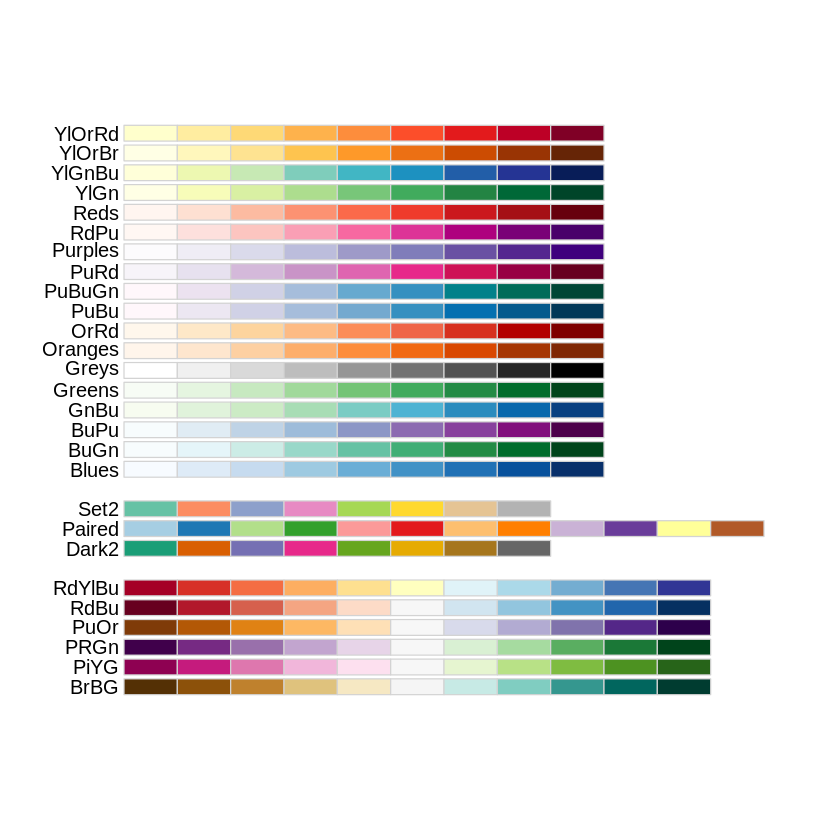

In [27]:
display.brewer.all(colorblindFriendly = T)  
#nombre de paletas de colores en este caso utilizaremos Dark2 por mayor variedad de colores y más accesibilidad para personas en situación de discapacidad visual

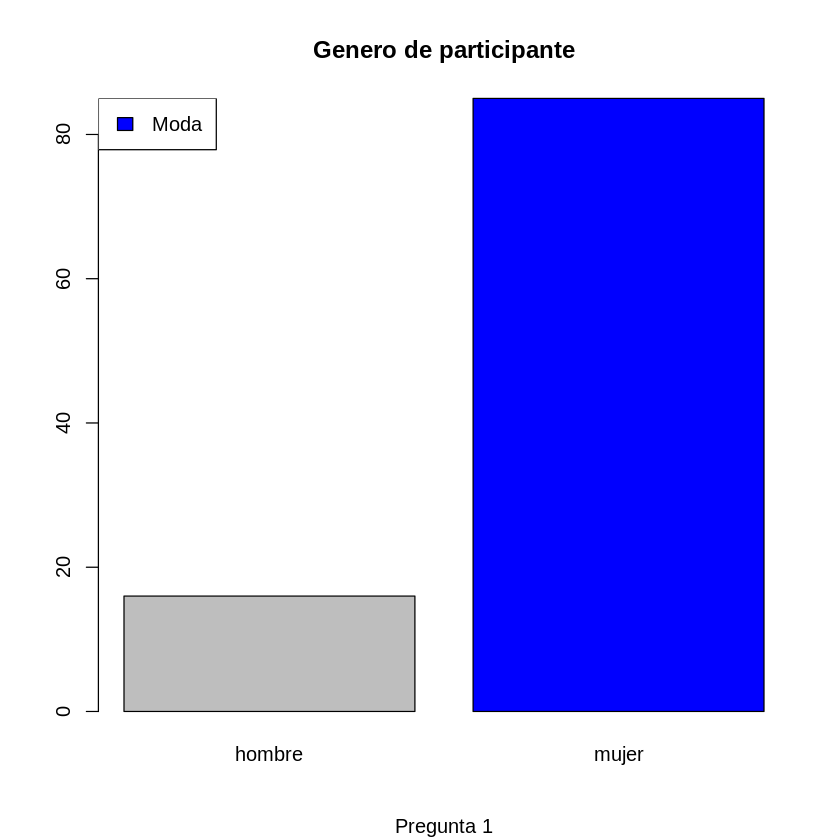

In [114]:
barplot(table(datos[,1]),main = "Genero de participante",sub = "Pregunta 1", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4)

In [29]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,1])))*100),2))
etiquetas <- c("Hombre", "Mujer")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

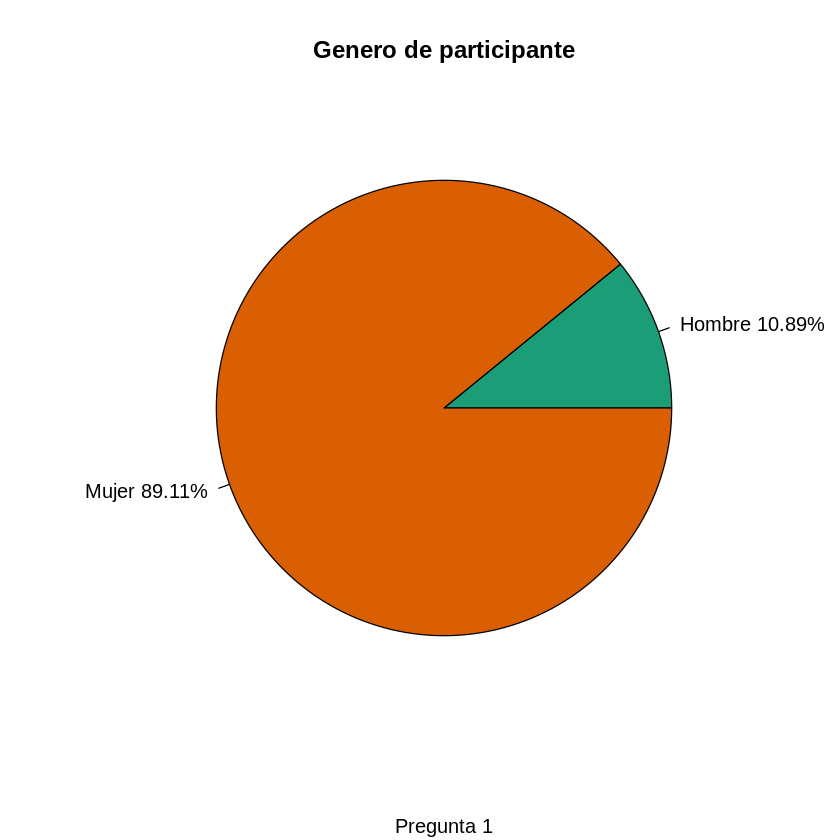

In [115]:
pie(porcentajes, etiquetas,
    main = "Genero de participante",
    sub = "Pregunta 1",
   col=brewer.pal(4, "Dark2"))

## Pregunta 2

## Tipo de dependencia de la escuela donde trabaja:

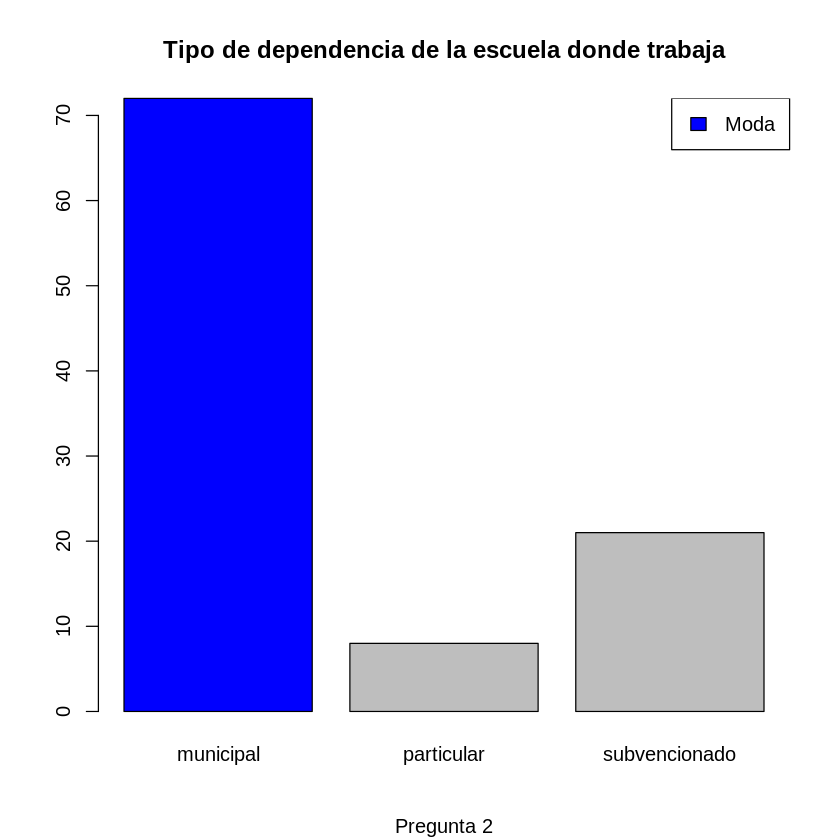

In [118]:
barplot(table(datos[,2]),main = "Tipo de dependencia de la escuela donde trabaja", col = c(4,rep("gray", 2)),sub='Pregunta 2')
legend("topright", "Moda", fill = 4)

In [120]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,2])))*100),2))
etiquetas <- c("Municipal", "particular","Subvencionado")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

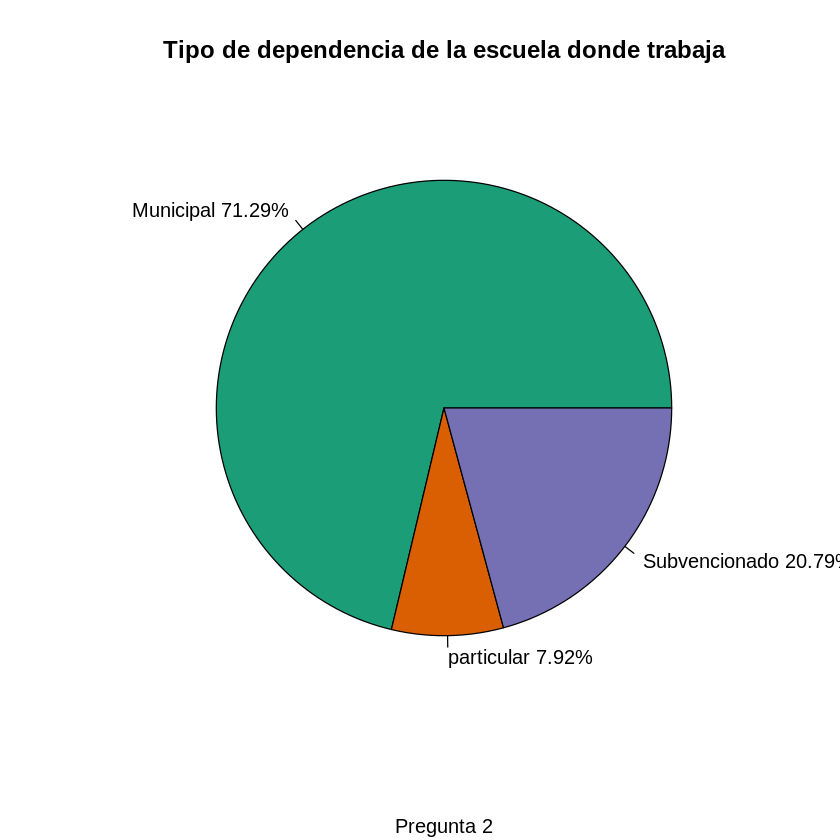

In [121]:
pie(porcentajes, etiquetas,
    main = "Tipo de dependencia de la escuela donde trabaja",
    sub = "Pregunta 2",
   col=brewer.pal(4, "Dark2"))

## Pregunta 3

## Edad:

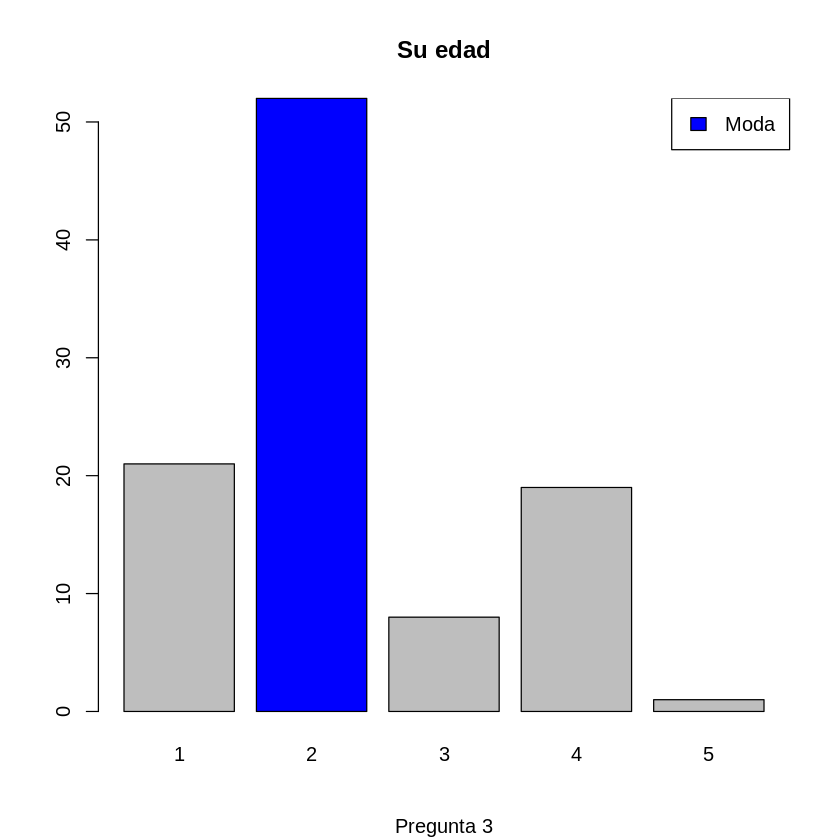

In [122]:
barplot(table(datos[,3]),main = "Su edad", col = c("gray",4,rep("gray", 3)),sub='Pregunta 3')
legend("topright", "Moda", fill = 4)

## Pregunta 4

## Profesión

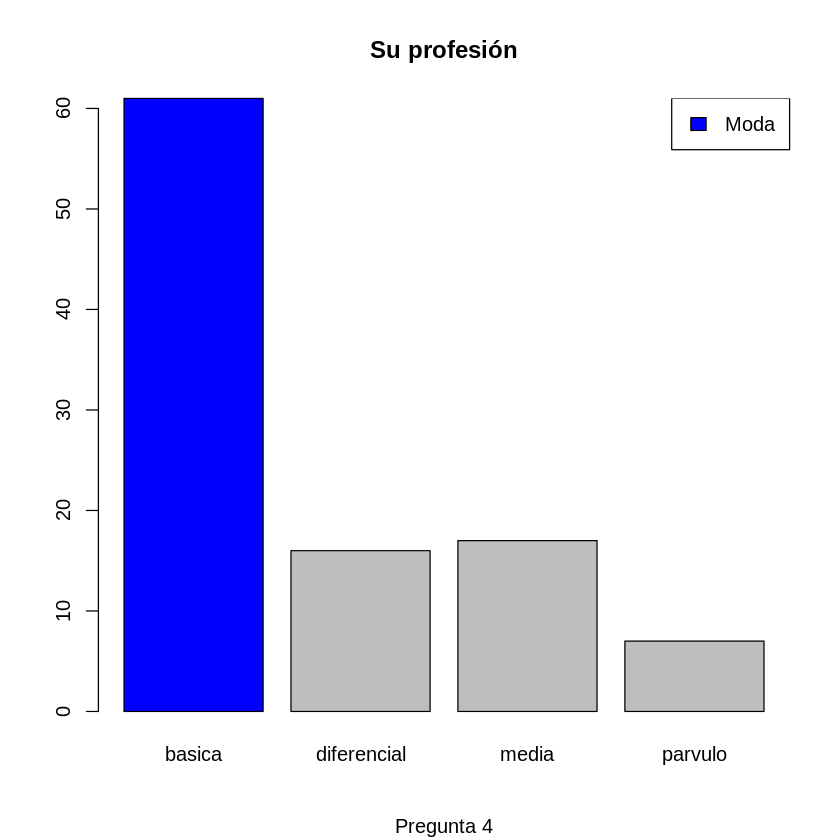

In [123]:
barplot(table(datos[,4]),main = "Su profesión", col = c(4,rep("gray", 3)), sub='Pregunta 4')
legend("topright", "Moda", fill = 4)

## Pregunta 5

## Genero de director(a)

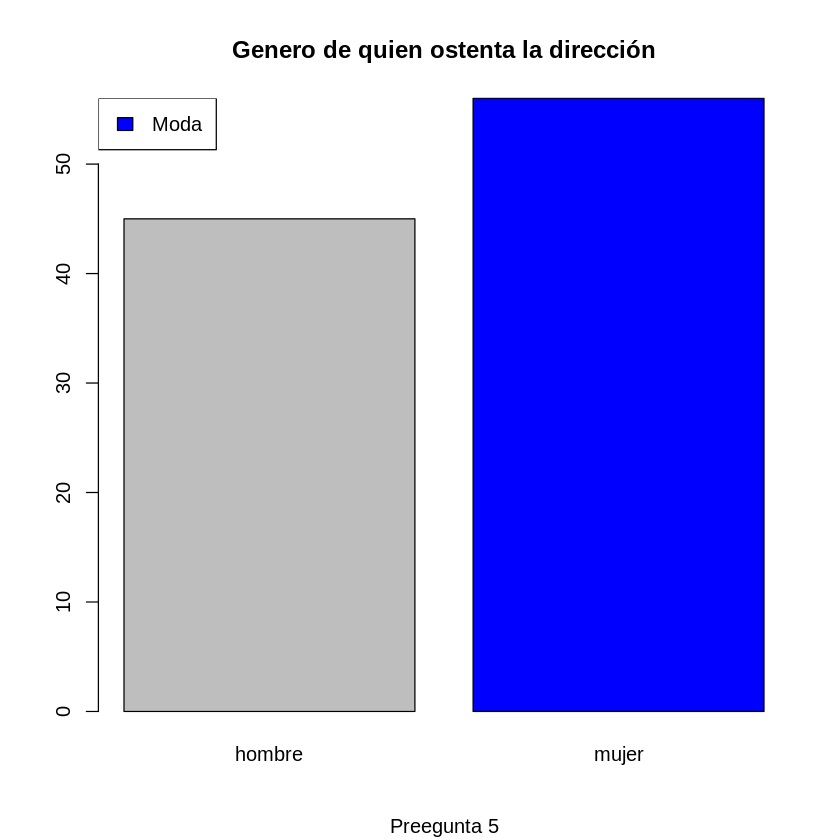

In [125]:
barplot(table(datos[,5]),main = "Genero de quien ostenta la dirección", col = c(rep("gray", 1),4), sub='Preegunta 5')
legend("topleft", "Moda", fill = 4)

## Pregunta 6

## Género UTP

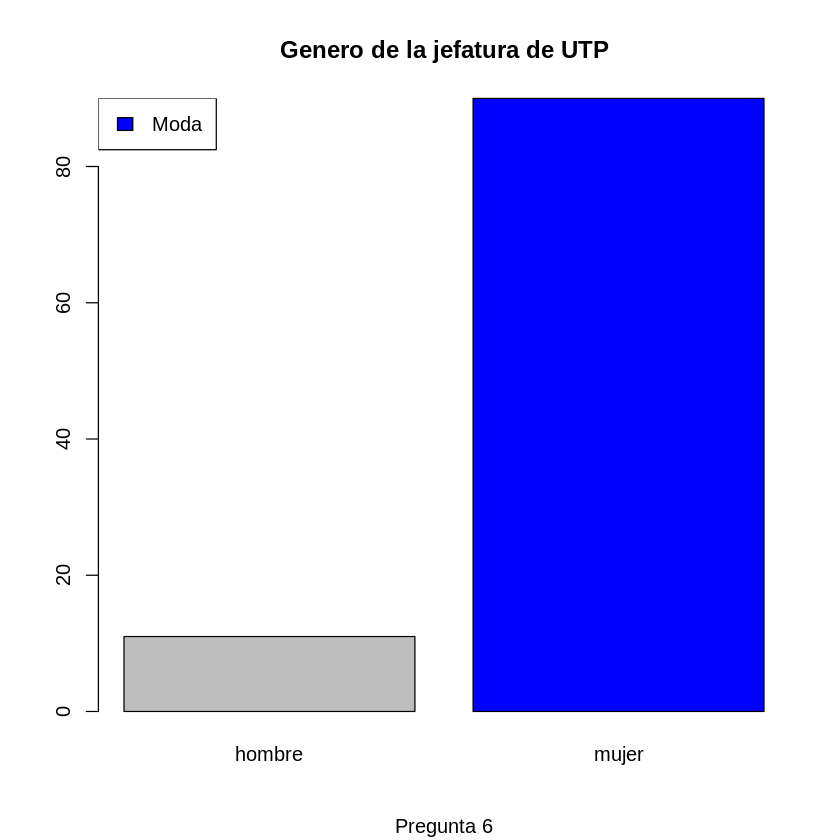

In [126]:
barplot(table(datos[,6]),main = "Genero de la jefatura de UTP", col = c(rep("gray", 1),4),sub='Pregunta 6')
legend("topleft", "Moda", fill = 4)

## Pregunta 7

## Género inspector(a) general

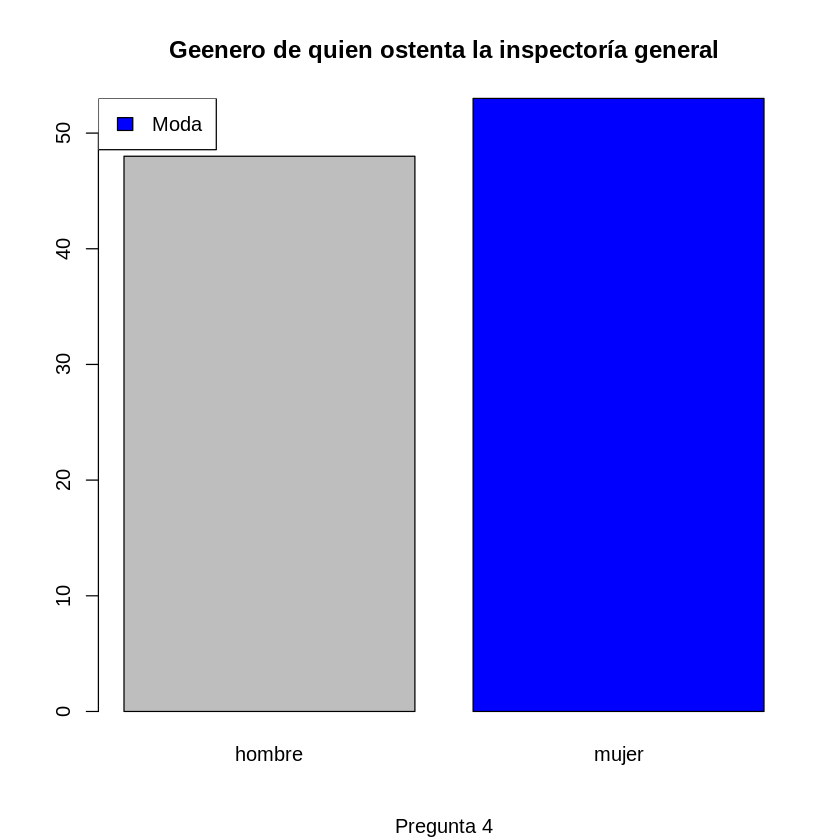

In [129]:
barplot(table(datos[,7]),main = "Geenero de quien ostenta la inspectoría general", col = c(rep("gray", 1),4),sub='Pregunta 4')
legend("topleft", "Moda", fill = 4)

# Analisis de clases latentes para data nominal


In [44]:
library(scatterplot3d)
library(poLCA)

# Democracia


In [45]:
datos_corregidos$`p22  requisito-centroestudiante`[datos_corregidos$`p22  requisito-centroestudiante` == "Sí"] <- 1
datos_corregidos$`p22  requisito-centroestudiante`[datos_corregidos$`p22  requisito-centroestudiante` == "No"] <- 2
datos_corregidos$`p22  requisito-centroestudiante`=as.numeric(datos_corregidos$`p22  requisito-centroestudiante`)
#datos_corregidos$`p22  requisito-centroestudiante`

In [46]:
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "lista"] <- 1
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "individual"] <- 2
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "eleccion-directorios"] <- 3
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "representante-curso"] <- 4
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "otro"] <- 5
datos_corregidos$`p23 postulacion-centroestudiantes`=as.numeric(datos_corregidos$`p23 postulacion-centroestudiantes`)
#datos_corregidos$`p23 postulacion-centroestudiantes`

In [47]:
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "votacion-estudiantes"] <- 1
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "designacion-directivos"] <- 2
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "eleccion-curso"] <- 3
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "otro"] <- 4
datos_corregidos$`p24 eleccion-centroestudiante`=as.numeric(datos_corregidos$`p24 eleccion-centroestudiante`)
#datos_corregidos$`p24 eleccion-centroestudiante`

In [48]:
# revisar si no involucrado es la penultima
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "autoridad-total"] <- 1
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "equipo-directivo"] <- 2
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "director-comunidad"] <- 3
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "comunidad autonoma"] <- 4
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "administrador"] <- 5
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "no-involucrado"] <- 6
datos_corregidos$`p27 decisiones-proyectos`=as.numeric(datos_corregidos$`p27 decisiones-proyectos`)
#datos_corregidos$`p27 decisiones-proyectos`

In [49]:
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "canalizadores"] <- 1
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "representantes"] <- 2
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "administradores"] <- 3
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "ninguna"] <- 4
datos_corregidos$`p28 rol-centroestudiante`=as.numeric(datos_corregidos$`p28 rol-centroestudiante`)
#datos_corregidos$`p28 rol-centroestudiante`

In [50]:
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "representantes"] <- 1
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "comunidad"] <- 2
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "reunion-abierta"] <- 3
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "sontenedor-director"] <- 4
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "escogidos"] <- 5
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "ninguna-anterior"] <- 6
datos_corregidos$`p29 elaboracion-pi`=as.numeric(datos_corregidos$`p29 elaboracion-pi`)
#datos_corregidos$`p29 elaboracion-pi`

In [51]:
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "administrador"] <- 1
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "gestor"] <- 2
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "ninguna-anterior"] <- 3
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "organizador"] <- 4
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "representar"] <- 5
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "velar-normas"] <- 6
datos_corregidos$`p30 rol-centropadres`=as.numeric(datos_corregidos$`p30 rol-centropadres`)
#datos_corregidos$`p30 rol-centropadres`

In [52]:
#Data democracia
data_democracia=cbind(datos_corregidos[,21:24],datos_corregidos[,27:30],datos_corregidos[,35:36])
names(data_democracia)=c('p21','p22','p23','p24','p27','p28','p29','p30','p35','p36')

In [53]:
f_democracia <- cbind(`p21`,`p22`,`p23`,`p24`,`p27`,`p28`,`p29`,`p30`,`p35`,`p36`)~1

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.1683 0.396 0.3762 0.0594

$p22
           Pr(1)  Pr(2)
class 1:  0.5545 0.4455

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.7129 0.0792 0.0396 0.1485 0.0198

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9109 0.0099 0.0693 0.0099

$p27
           Pr(1)  Pr(2)  Pr(3) Pr(4)  Pr(5)  Pr(6)
class 1:  0.0495 0.3663 0.5347     0 0.0198 0.0297

$p28
           Pr(1)  Pr(2)  Pr(3) Pr(4)
class 1:  0.4356 0.3861 0.0792 0.099

$p29
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4554 0.0198 0.2277 0.1188 0.0891 0.0891

$p30
           Pr(1)  Pr(2)  Pr(3)  Pr(4) Pr(5)  Pr(6)
class 1:  0.0198 0.3168 0.0495 0.3069 0.297 0.0099

$p35
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4455 0.3267 0.1782 0.0495

$p36
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.3564 0.495 0.1089 0.0396

Estimated class populati

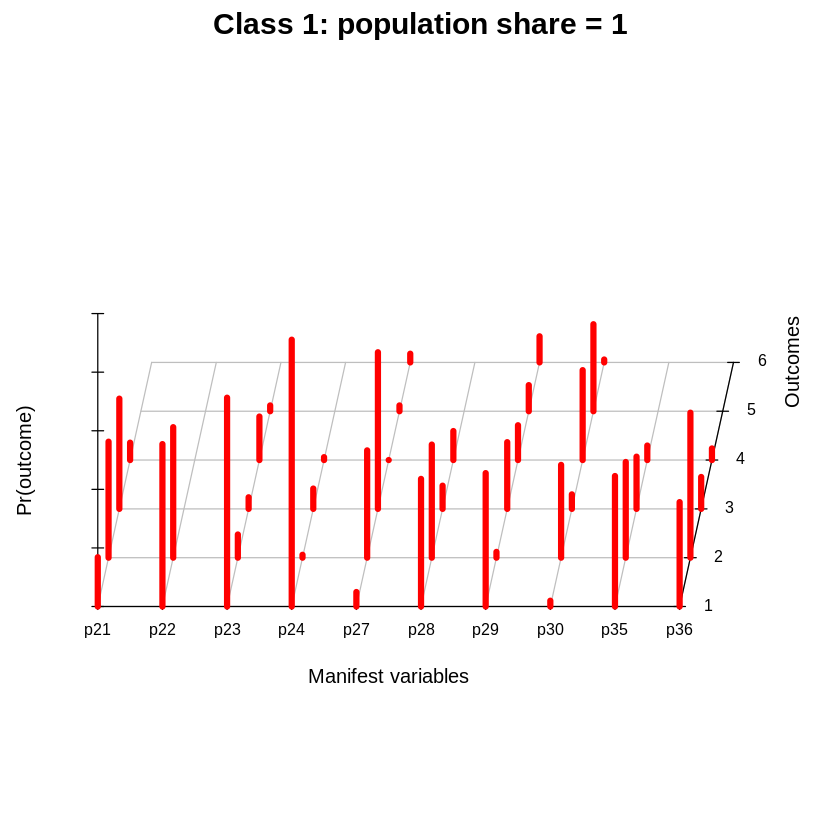

In [54]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 1, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4315 0.4888 0.0796 0.0000
class 2:  0.1293 0.3823 0.4202 0.0682

$p22
           Pr(1)  Pr(2)
class 1:  0.0000 1.0000
class 2:  0.6366 0.3634

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.1709 0.0910 0.2029 0.3818 0.1535
class 2:  0.7932 0.0775 0.0154 0.1140 0.0000

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.6177 0.0767 0.2289 0.0767
class 2:  0.9543 0.0000 0.0457 0.0000

$p27
           Pr(1)  Pr(2)  Pr(3) Pr(4)  Pr(5)  Pr(6)
class 1:  0.0805 0.2907 0.3220     0 0.1535 0.1533
class 2:  0.0449 0.3775 0.5662     0 0.0000 0.0114

$p28
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.2824 0.0902 0.0805 0.5469
class 2:  0.4583 0.4300 0.0790 0.0327

$p29
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.1527 0.0000 0.0783 0.3073 0.1544 0.3073
class 2:  0.5003 0.0227 0.2499 0.0909 0.0794 0.0568

$p30

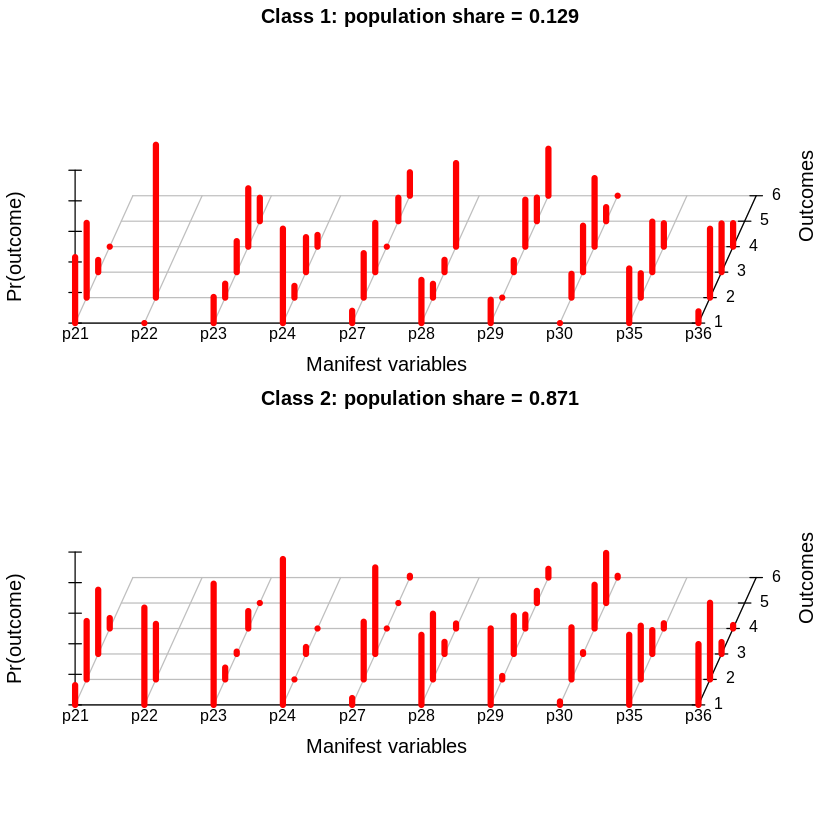

In [55]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 2, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1849 0.3708 0.3841 0.0603
class 2:  0.2816 0.4502 0.2068 0.0614
class 3:  0.0806 0.3796 0.4824 0.0574

$p22
           Pr(1)  Pr(2)
class 1:  0.6484 0.3516
class 2:  0.3692 0.6308
class 3:  0.6048 0.3952

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.8470 0.0307 0.0000 0.1224 0.0000
class 2:  0.4054 0.2554 0.1089 0.2304 0.0000
class 3:  0.8132 0.0000 0.0243 0.1144 0.0482

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9695 0.0000 0.0305 0.0000
class 2:  0.7791 0.0364 0.1845 0.0000
class 3:  0.9530 0.0000 0.0229 0.0241

$p27
           Pr(1)  Pr(2)  Pr(3) Pr(4)  Pr(5)  Pr(6)
class 1:  0.0000 0.3373 0.6627     0 0.0000 0.0000
class 2:  0.1819 0.2704 0.3659     0 0.0728 0.1091
class 3:  0.0000 0.4522 0.5478     0 0.0000 0.0000

$p28
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.7067 0.2933 0.0000 0.0000
class 2: 

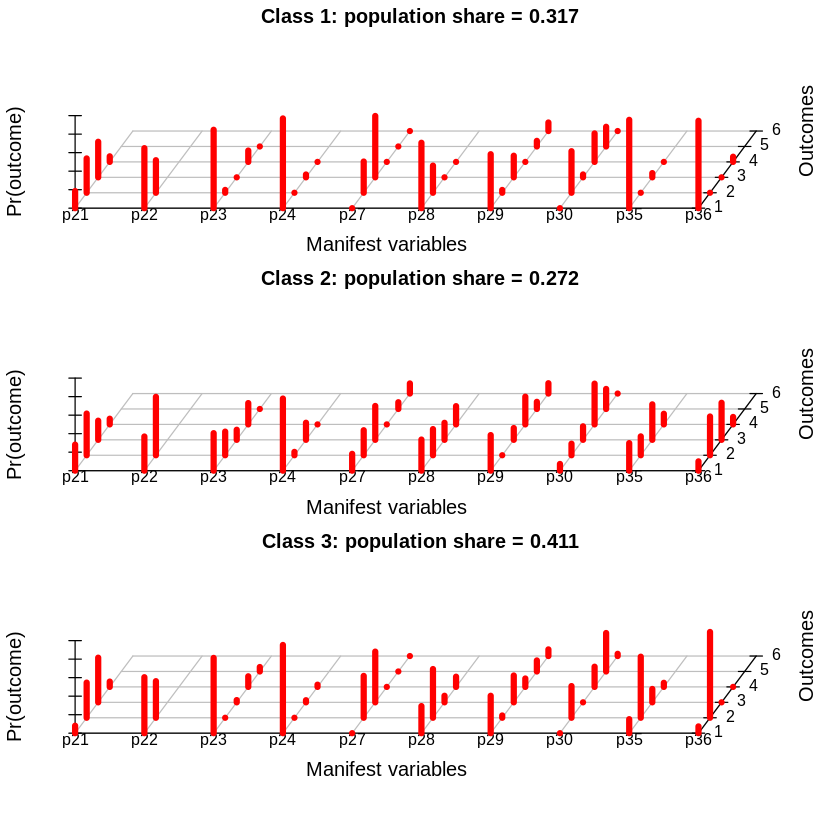

In [56]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 3, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1456 0.4830 0.3714 0.0000
class 2:  0.0445 0.3997 0.4891 0.0667
class 3:  0.4359 0.0000 0.3115 0.2526
class 4:  0.4536 0.5464 0.0000 0.0000

$p22
           Pr(1)  Pr(2)
class 1:  0.6894 0.3106
class 2:  0.5780 0.4220
class 3:  0.6035 0.3965
class 4:  0.0000 1.0000

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.7888 0.0301 0.0000 0.1812 0.0000
class 2:  0.7559 0.1329 0.0222 0.0890 0.0000
class 3:  1.0000 0.0000 0.0000 0.0000 0.0000
class 4:  0.0000 0.0930 0.2721 0.4534 0.1814

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9698 0.0000 0.0302 0.0000
class 2:  0.9333 0.0000 0.0667 0.0000
class 3:  1.0000 0.0000 0.0000 0.0000
class 4:  0.5466 0.0907 0.2720 0.0907

$p27
           Pr(1)  Pr(2)  Pr(3) Pr(4)  Pr(5)  Pr(6)
class 1:  0.0302 0.4453 0.5245     0 0.0000 0.0000
class 2:  0.0667 0.3557 0.5776     0 0.0000 0.00

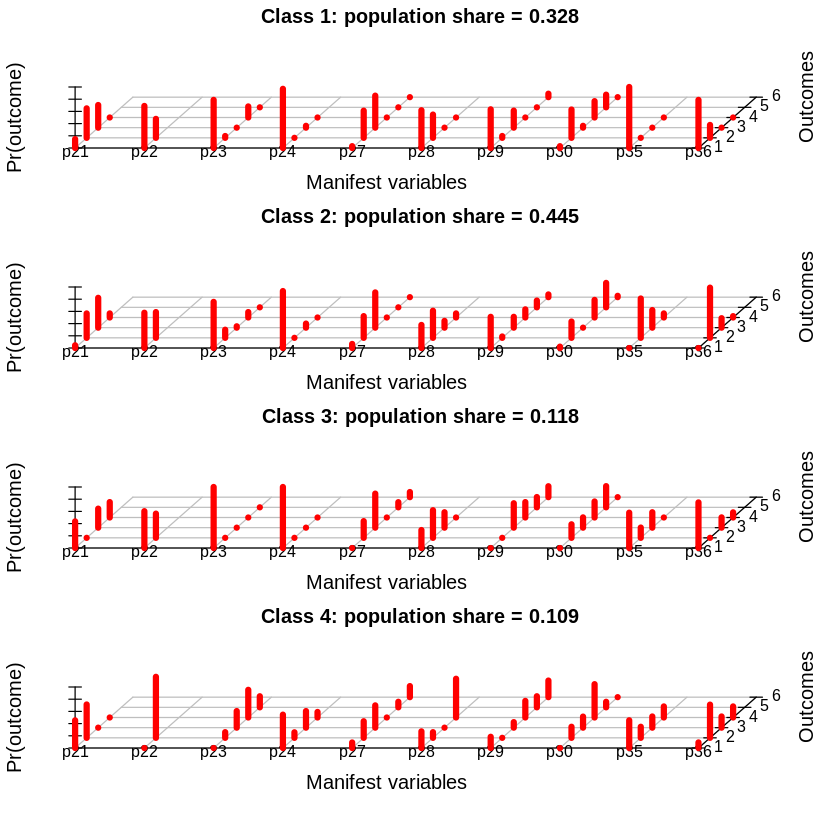

In [57]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 4, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

# Ciudadanía

In [58]:
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "altos-puntajes"] <- 1
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "comunitarios"] <- 2
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "confesionarios"] <- 3
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "diciplinares"] <- 4
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "inclusivos"] <- 5
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "laborales"] <- 6
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "ninguna-anterior"] <- 7
datos_corregidos$`p31 obgetivo-pedagogico`=as.numeric(datos_corregidos$`p31 obgetivo-pedagogico`)
#datos_corregidos$`p31 obgetivo-pedagogico`

In [59]:
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "entregar-recursos"] <- 1
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "ninguna-anterior"] <- 2
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "promover-ciudadania"] <- 3
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "sin-rol"] <- 4
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "supervisar-cumplimiento"] <- 5
datos_corregidos$`p32 rol-director-ciudadania`=as.numeric(datos_corregidos$`p32 rol-director-ciudadania`)
#datos_corregidos$`p32 rol-director-ciudadania`

In [60]:
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "asignatura"] <- 1
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "historia"] <- 2
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "orientacion"] <- 3
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "transversal"] <- 4
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "otra"] <- 5
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "no-se-realiza"] <- 6
datos_corregidos$`p33 ciudadania-como`=as.numeric(datos_corregidos$`p33 ciudadania-como`)
#datos_corregidos$`p33 ciudadania-como`

In [61]:
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "agencia-calidad"] <- 1
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "curriculo"] <- 2
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "democracia"] <- 3
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "no-orientación"] <- 4
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "otro"] <- 5
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "simce"] <- 6
datos_corregidos$`p34 orientacion-director-ciudadania`=as.numeric(datos_corregidos$`p34 orientacion-director-ciudadania`)


In [62]:
#Data democracia
data_ciudadania=datos_corregidos[,31:34]
names(data_ciudadania)=c('p31','p32','p33','p34')

In [63]:
f_ciudadania <- cbind(`p31`,`p32`,`p33`,`p34`)~1

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
          Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)  Pr(7)
class 1:  0.099 0.4158 0.0099 0.1386 0.2277 0.0495 0.0594

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.1386 0.1188 0.4455 0.1782 0.1188

$p33
          Pr(1)  Pr(2) Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.198 0.3267 0.099 0.3069 0.0396 0.0297

$p34
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.1188 0.2376 0.3267 0.2574 0.0297 0.0297

Estimated class population shares 
 1 
 
Predicted class memberships (by modal posterior prob.) 
 1 
 
Fit for 1 latent classes: 
number of observations: 101 
number of estimated parameters: 20 
residual degrees of freedom: 81 
maximum log-likelihood: -610.3298 
 
AIC(1): 1260.66
BIC(1): 1312.962
G^2(1): 361.3647 (Likelihood ratio/deviance statistic) 
X^2(1): 2669.052 (Chi-square goodness of fit) 
 


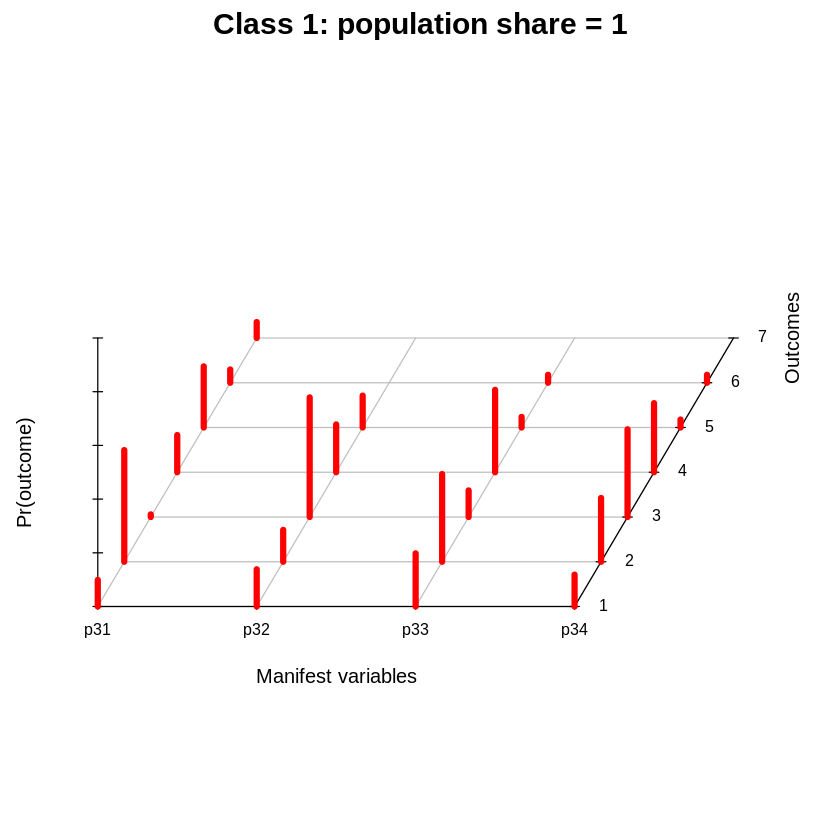

In [64]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 1, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)  Pr(7)
class 1:  0.3259 0.0000 0.0326 0.3142 0.1537 0.0892 0.0843
class 2:  0.0000 0.5973 0.0000 0.0620 0.2600 0.0322 0.0485

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.2245 0.1707 0.0511 0.2633 0.2904
class 2:  0.1011 0.0962 0.6177 0.1411 0.0439

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.2730 0.3469 0.1906 0.0917 0.0000 0.0978
class 2:  0.1653 0.3179 0.0590 0.4008 0.0569 0.0000

$p34
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.2818 0.0763 0.2702 0.3409 0.0308 0.0000
class 2:  0.0477 0.3080 0.3514 0.2210 0.0292 0.0427

Estimated class population shares 
 0.3038 0.6962 
 
Predicted class memberships (by modal posterior prob.) 
 0.2871 0.7129 
 
Fit for 2 latent classes: 
number of observations: 101 
number of estimated parameters: 41 
residual degrees of freedom: 60 
maxi

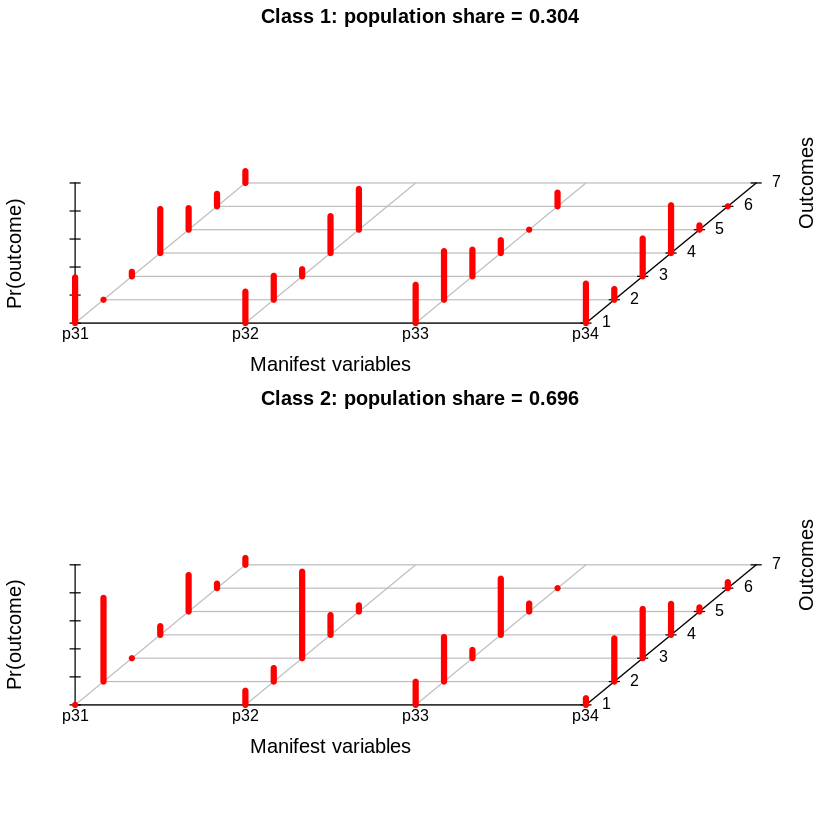

In [65]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 2, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)  Pr(7)
class 1:  0.0254 0.5857 0.0000 0.0522 0.2632 0.0333 0.0402
class 2:  0.2213 0.0946 0.0000 0.3783 0.1971 0.1087 0.0000
class 3:  0.1153 0.4424 0.0553 0.0000 0.1736 0.0000 0.2135

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.1276 0.0280 0.7761 0.0329 0.0354
class 2:  0.2429 0.0599 0.1236 0.3076 0.2659
class 3:  0.0000 0.4828 0.0000 0.3939 0.1233

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.1898 0.2600 0.0571 0.4931 0.0000 0.0000
class 2:  0.3035 0.5582 0.1384 0.0000 0.0000 0.0000
class 3:  0.0492 0.1438 0.1579 0.2621 0.2211 0.1659

$p34
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.0533 0.3739 0.4530 0.1198 0.0000 0.0000
class 2:  0.3089 0.0000 0.2993 0.2907 0.0000 0.1012
class 3:  0.0000 0.2259 0.0000 0.6082 0.1659 0.0000

Estimated class population shares 
 0.5273 0.293

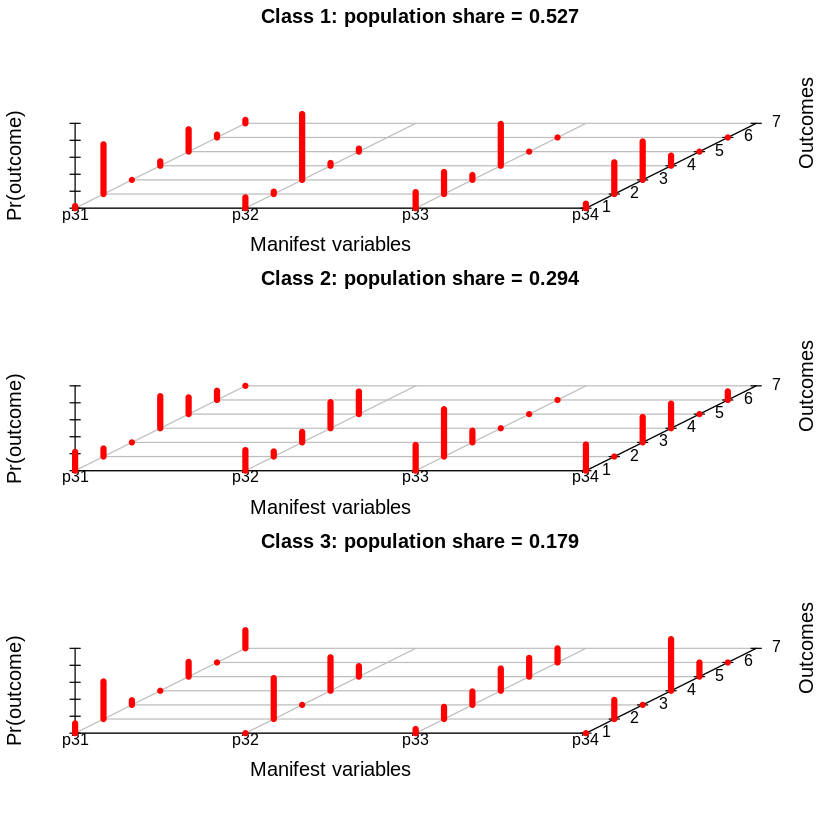

In [66]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 3, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

## El caso de 3 clustering tiene un AIC 1256 que es el mejor de los casos entre 1 y 4 clustering

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)  Pr(7)
class 1:  0.2028 0.1244 0.0682 0.2708 0.1294 0.0000 0.2045
class 2:  0.0000 0.7082 0.0000 0.0000 0.2223 0.0695 0.0000
class 3:  0.3268 0.0000 0.0000 0.3430 0.2158 0.1143 0.0000
class 4:  0.0000 0.5769 0.0000 0.0607 0.2692 0.0246 0.0686

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0000 0.3600 0.0000 0.6400 0.0000
class 2:  0.0000 0.3184 0.3348 0.3468 0.0000
class 3:  0.4082 0.0000 0.1591 0.0602 0.3725
class 4:  0.1195 0.0000 0.7892 0.0000 0.0913

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.1524 0.1732 0.2722 0.1978 0.0000 0.2045
class 2:  0.1038 0.5606 0.0000 0.1934 0.1422 0.0000
class 3:  0.3020 0.5396 0.0975 0.0609 0.0000 0.0000
class 4:  0.2077 0.1608 0.0894 0.5192 0.0229 0.0000

$p34
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.0000 0.2045 0.0000 0.7955 0.0000 0.00

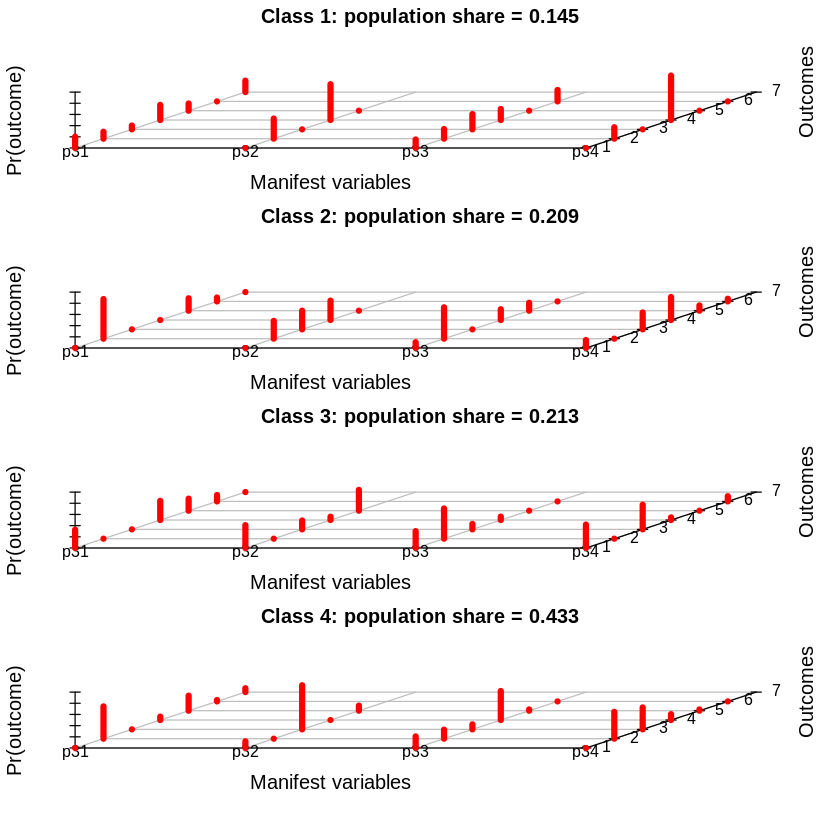

In [67]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 4, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

# Transformación de datos caracteristicos

In [68]:
datos_corregidos$`p1 genero`[datos_corregidos$`p1 genero`=='mujer']<- 1
datos_corregidos$`p1 genero`[datos_corregidos$`p1 genero`=='hombre']<- 2
datos_corregidos$`p1 genero`=as.numeric(datos_corregidos$`p1 genero`)
#datos_corregidos$`p1 genero`

In [69]:
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "municipal"] <- 1
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "particular"] <- 2
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "subvencionado"] <- 3
datos_corregidos$`p2 dependencia`=as.numeric(datos_corregidos$`p2 dependencia`)
#datos_corregidos$`p2 dependencia`

In [70]:
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "basica"] <- 1
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "diferencial"] <- 2
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "media"] <- 3
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "parvulo"] <- 4
datos_corregidos$`p4 profesion`=as.numeric(datos_corregidos$`p4 profesion`)
#datos_corregidos$`p4 profesion`

In [71]:
datos_corregidos$`p5 genero-director`[datos_corregidos$`p5 genero-director`=='mujer']<- 1
datos_corregidos$`p5 genero-director`[datos_corregidos$`p5 genero-director`=='hombre']<- 2
datos_corregidos$`p5 genero-director`=as.numeric(datos_corregidos$`p5 genero-director`)
#datos_corregidos$`p5 genero-director`

In [72]:
datos_corregidos$`p6 genero-utp`[datos_corregidos$`p6 genero-utp`=='mujer']<- 1
datos_corregidos$`p6 genero-utp`[datos_corregidos$`p6 genero-utp`=='hombre']<- 2
datos_corregidos$`p6 genero-utp`=as.numeric(datos_corregidos$`p6 genero-utp`)
#datos_corregidos$`p6 genero-utp`

In [73]:
datos_corregidos$`p7genero-inspector`[datos_corregidos$`p7genero-inspector`=='mujer']<- 1
datos_corregidos$`p7genero-inspector`[datos_corregidos$`p7genero-inspector`=='hombre']<- 2
datos_corregidos$`p7genero-inspector`=as.numeric(datos_corregidos$`p7genero-inspector`)
#datos_corregidos$`p7genero-inspector`

In [74]:
head(datos_corregidos)

p1 genero,p2 dependencia,p3 edad,p4 profesion,p5 genero-director,p6 genero-utp,p7genero-inspector,p8 decision-autorizacion,p9 director-encargado-normas,p10 director-manda,⋯,p33 ciudadania-como,p34 orientacion-director-ciudadania,p35 director-conflicto-estudiantes,p36 director-conflicto-apoderados,p37 director-facilitador,p38 director-reconoce,p39 director-valoracion-diversidad,p40 director-dialogogante,p41 director-valoracion-gobiernoest,p42 director-valoracion-funcionarios
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,1,2,2,3,2,3,⋯,4,4,3,2,3,3,4,3,3,3
1,1,2,1,1,1,2,4,4,2,⋯,4,3,1,1,4,4,4,4,4,4
1,1,3,1,1,1,2,3,2,3,⋯,5,2,2,2,3,3,3,3,3,3
1,1,2,1,1,1,1,4,3,4,⋯,3,5,3,3,3,1,3,2,1,1
1,1,3,1,1,1,2,2,2,2,⋯,4,3,3,2,3,3,3,3,3,3
1,1,4,1,1,1,2,4,4,4,⋯,4,2,1,1,4,4,4,4,4,4


In [75]:
table(datos_corregidos$`p1 genero`)


 1  2 
85 16 

# Analisis Factorial para data ordinal

In [76]:
library(psych)
load("polychoric")

# Liderazgo autoritario

In [77]:
data_LA=datos_corregidos[,8:17]
names(data_LA)=c('p8','p9','p10','p11','p12','p13','p14','p15','p16','p17')
des_LA = describe(data_LA)

In [78]:
knitr::kable(des_LA[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p8  |   1|   4| 3.267327|      3| -0.5878327| -0.2258755|
|p9  |   1|   4| 3.158416|      3| -0.6810840| -0.4258163|
|p10 |   1|   4| 3.326733|      4| -0.7567251| -0.6208793|
|p11 |   1|   4| 2.762376|      3| -0.0878248| -0.8277658|
|p12 |   1|   4| 2.475248|      3| -0.0613560| -0.7120675|
|p13 |   1|   4| 2.069307|      2|  0.5060337| -0.6918753|
|p14 |   1|   4| 1.861386|      2|  0.9267139| -0.1746832|
|p15 |   1|   4| 1.910891|      2|  0.7728314| -0.1097034|
|p16 |   1|   4| 2.396040|      2|  0.1163736| -1.1821349|
|p17 |   1|   4| 1.920792|      2|  0.7391513|  0.0242437|

In [79]:
poly_cor_LA = polychoric(data_LA)
rho_LA = poly_cor_LA$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_LA$tau

,1,2,3
p8,-2.3300789,-1.13249653,0.23799988
p9,-1.7553005,-0.77957077,0.21254334
p10,-2.3300789,-0.92217818,-0.03723576
p11,-1.5597800,-0.26361161,0.77957077
p12,-1.0865681,-0.01240937,1.23234086
p13,-0.4765770,0.53296269,1.34626267
p14,-0.1369262,0.81365681,1.28721373
p15,-0.3415717,0.81365681,1.48097265
p16,-0.7139671,0.11191464,0.92217818
p17,-0.4216681,0.84871553,1.55977999


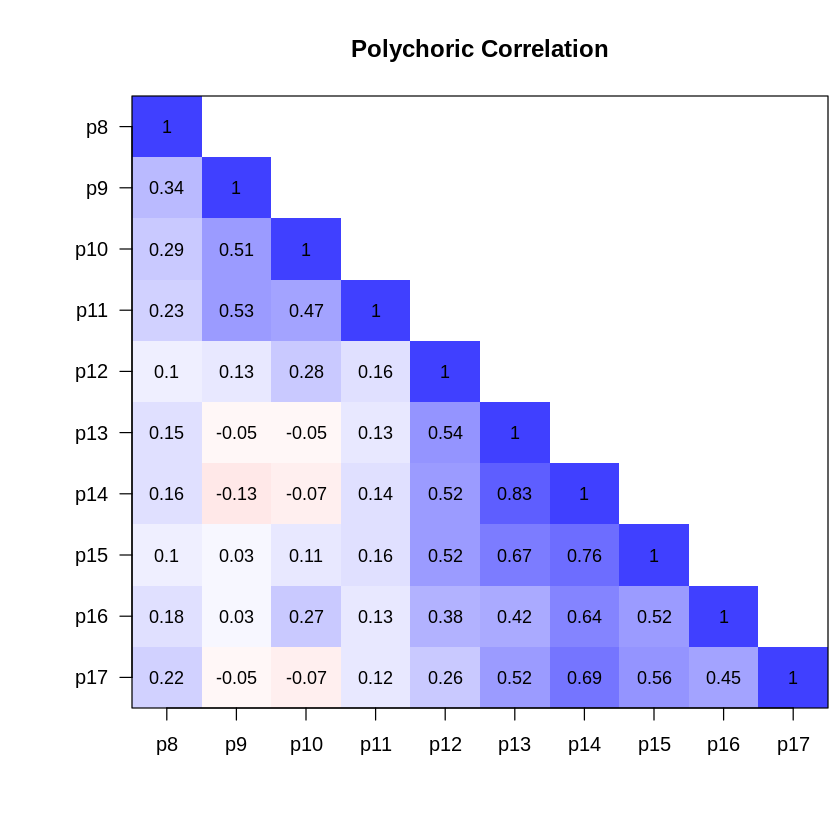

In [80]:
cor.plot(rho_LA, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

In [81]:
KMO(rho_LA)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_LA)
Overall MSA =  0.73
MSA for each item = 
  p8   p9  p10  p11  p12  p13  p14  p15  p16  p17 
0.65 0.64 0.53 0.58 0.82 0.80 0.67 0.88 0.68 0.88 

Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


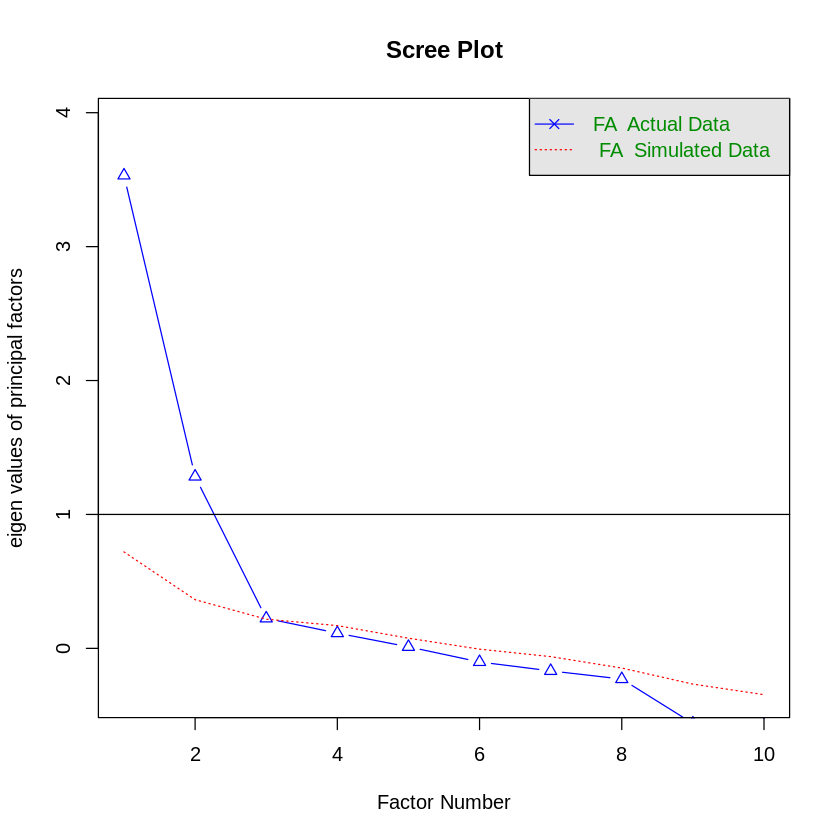

In [82]:
fa.parallel(rho_LA, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

## Caso 2 clusters.

In [83]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loading


Loadings:
    ML1    ML2   
p8   0.162  0.383
p9  -0.131  0.700
p10         0.802
p11  0.144  0.610
p12  0.523  0.306
p13  0.827       
p14  0.997       
p15  0.761  0.174
p16  0.643  0.252
p17  0.690       

                 ML1   ML2
SS loadings    3.492 1.841
Proportion Var 0.349 0.184
Cumulative Var 0.349 0.533

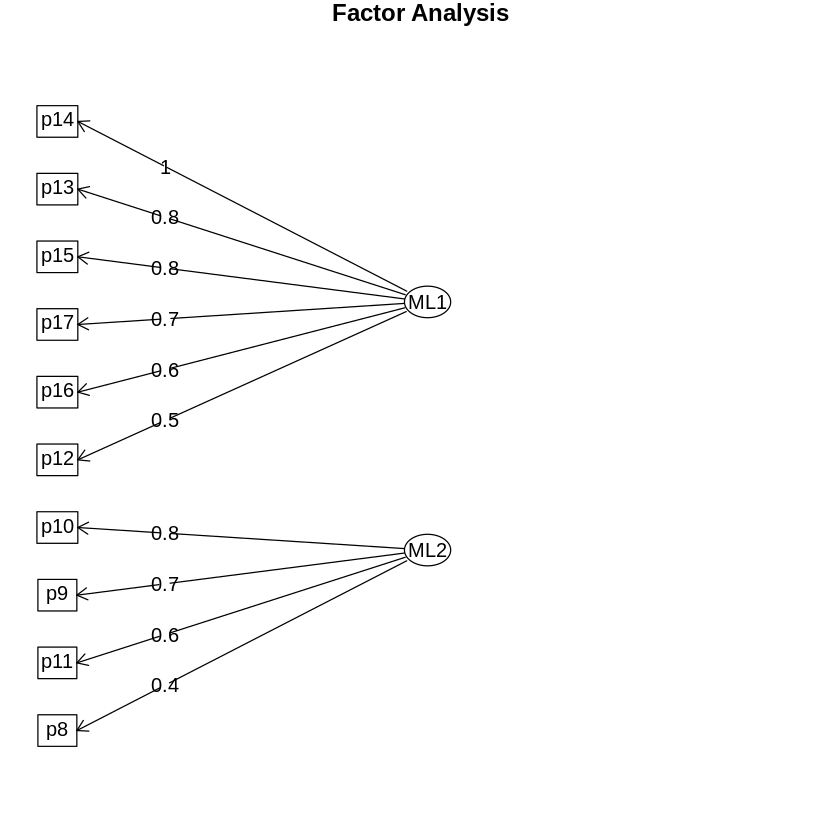

In [84]:
fa.diagram(poly_model_LA)

## Caso 3 clusters.

In [85]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loadings


Loadings:
    ML1    ML3    ML2   
p8   0.187  0.379       
p9          0.734 -0.203
p10  0.122  0.659 -0.414
p11  0.150  0.665       
p12  0.493  0.292  0.181
p13  0.677  0.108  0.498
p14  0.894         0.443
p15  0.698  0.170  0.305
p16  0.915        -0.396
p17  0.624         0.294

                 ML1   ML3   ML2
SS loadings    3.289 1.685 1.027
Proportion Var 0.329 0.168 0.103
Cumulative Var 0.329 0.497 0.600

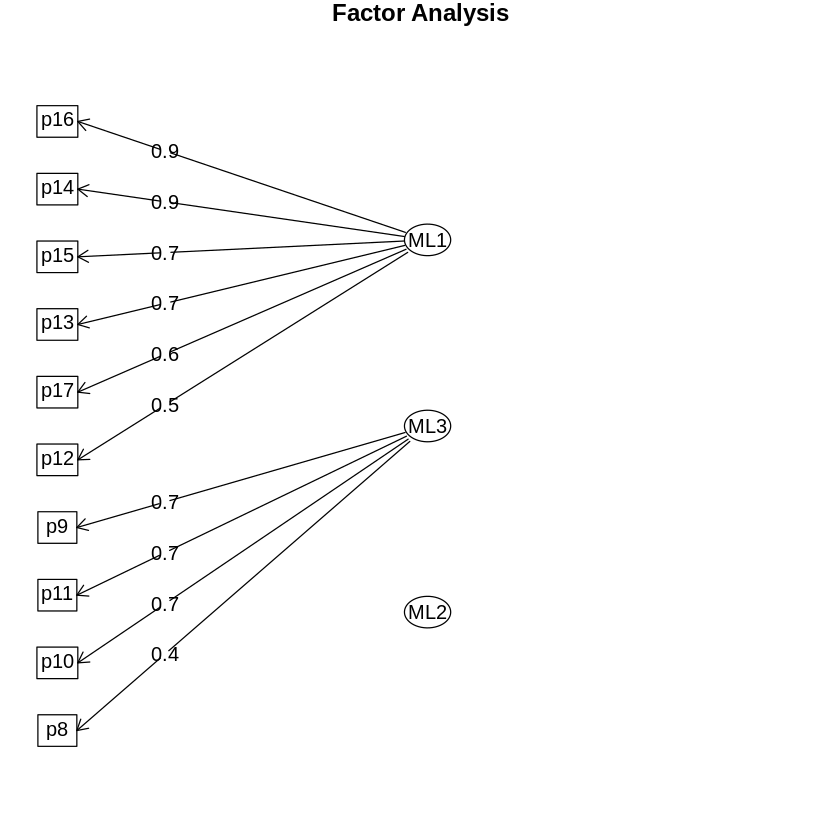

In [86]:
fa.diagram(poly_model_LA)

# Formación minimalista

In [87]:
data_FM = datos_corregidos[,18:20]
names(data_FM)=c('p18','P19','p20')
des_FM = describe(data_FM)

In [88]:
knitr::kable(des_FM[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p18 |   1|   4| 2.970297|      3| -0.6270447| -0.5561803|
|P19 |   1|   4| 2.990099|      3| -0.7426215| -0.6895873|
|p20 |   1|   4| 2.633663|      3| -0.2241618| -1.2017605|

In [89]:
poly_cor_FM = polychoric(data_FM)
rho_FM = poly_cor_FM$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_FM$tau

,1,2,3
p18,-1.2872137,-0.6209182,0.4216681
P19,-1.0428242,-0.6513021,0.2636116
p20,-0.8487155,-0.2125433,0.6822996


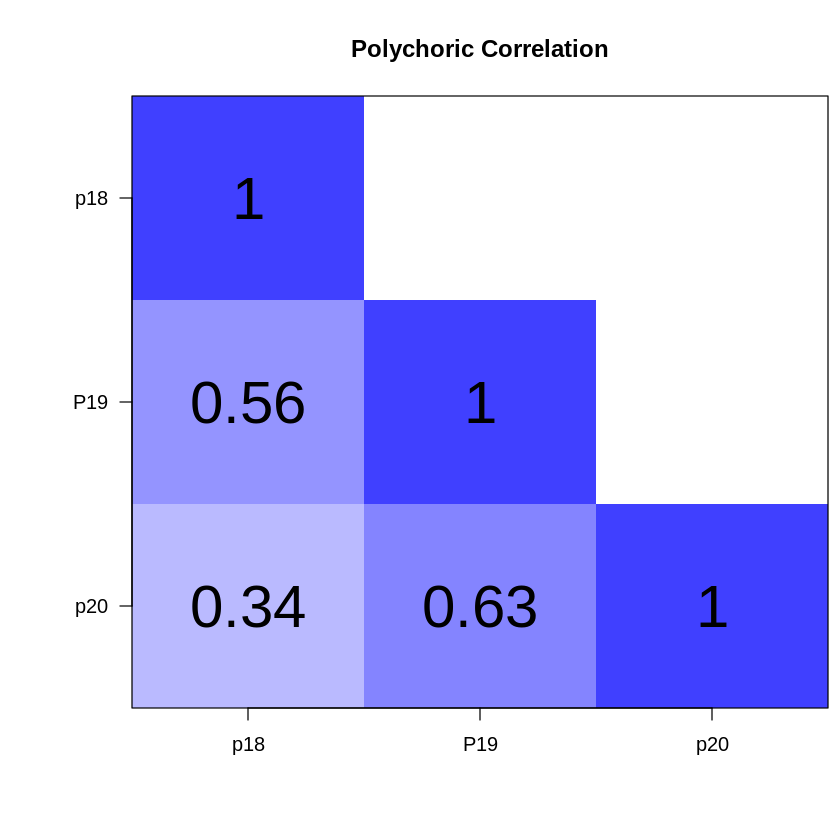

In [90]:
cor.plot(rho_FM, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

In [91]:
KMO(rho_FM)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_FM)
Overall MSA =  0.6
MSA for each item = 
 p18  P19  p20 
0.66 0.57 0.62 

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


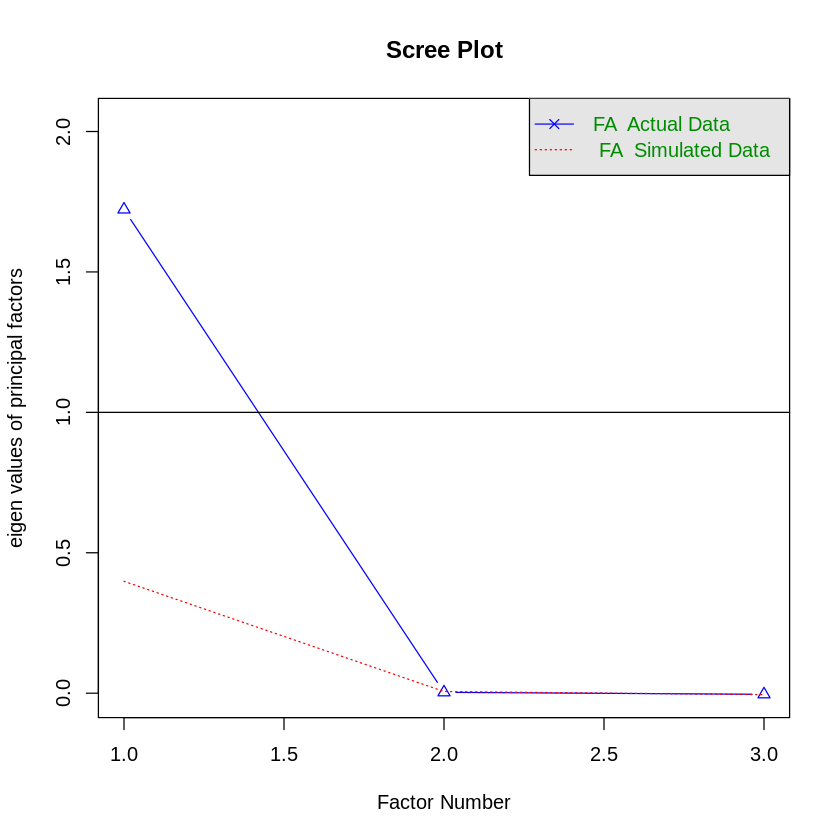

In [92]:
fa.parallel(rho_FM, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

## Caso 1 cluster.

In [93]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1  
p18 0.564
P19 0.997
p20 0.635

                 ML1
SS loadings    1.717
Proportion Var 0.572

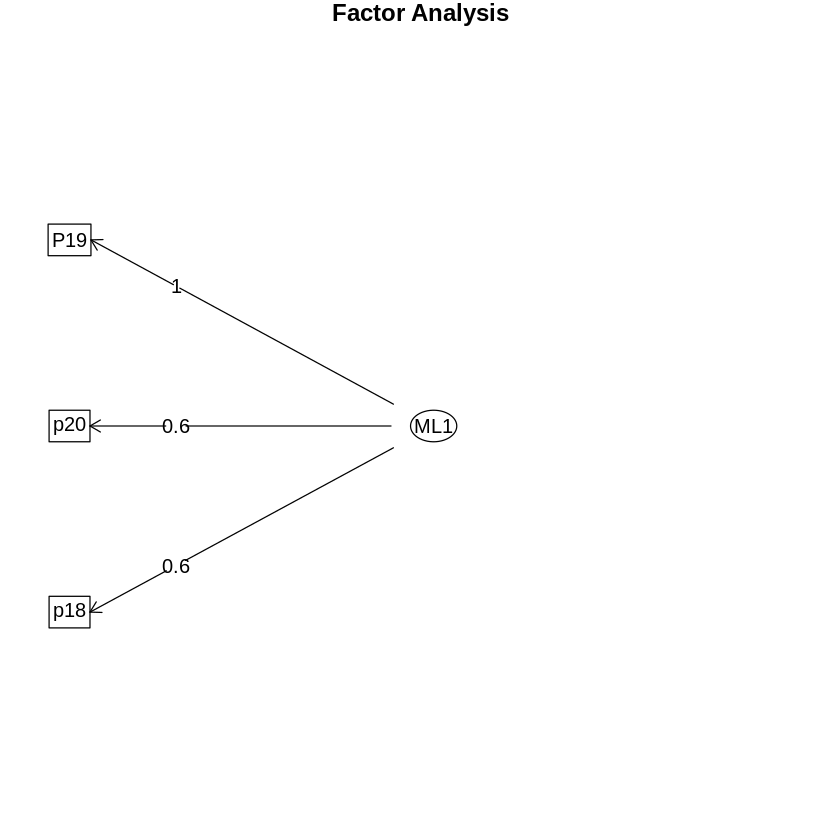

In [94]:
fa.diagram(poly_model_FM)

## Caso 2 clusters.

In [95]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1    ML2   
p18  0.653  0.422
P19  0.858       
p20  0.741 -0.331

                 ML1   ML2
SS loadings    1.712 0.288
Proportion Var 0.571 0.096
Cumulative Var 0.571 0.667

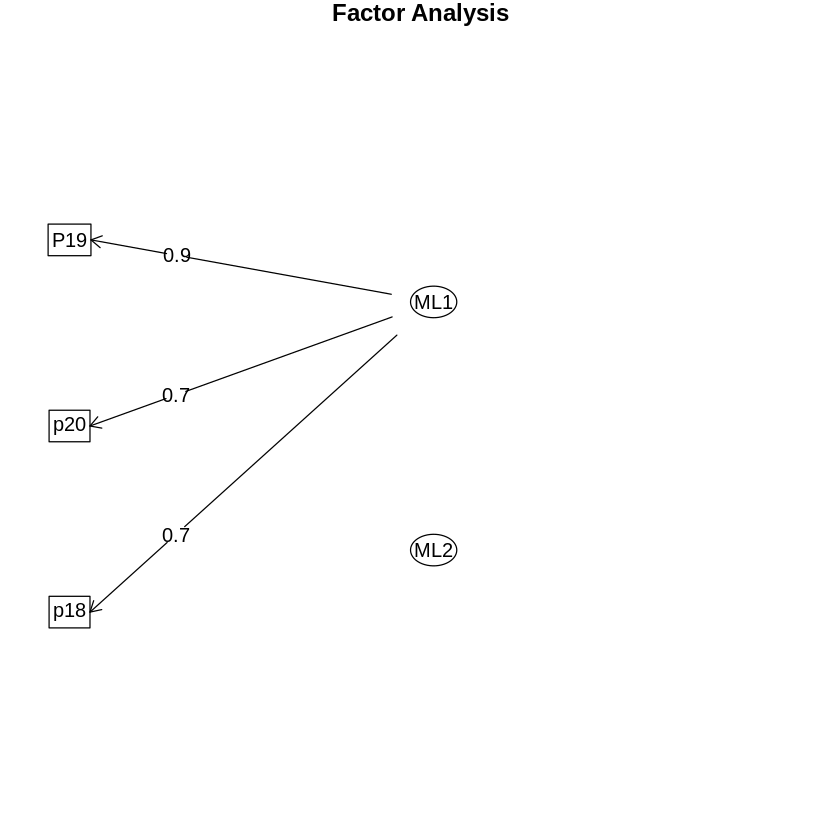

In [96]:
fa.diagram(poly_model_FM)

## Caso 3 clusters.

In [97]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1    ML2    ML3   
p18  0.609              
P19  0.797              
p20  0.687              

                 ML1   ML2   ML3
SS loadings    1.478 0.013 0.000
Proportion Var 0.493 0.004 0.000
Cumulative Var 0.493 0.497 0.497

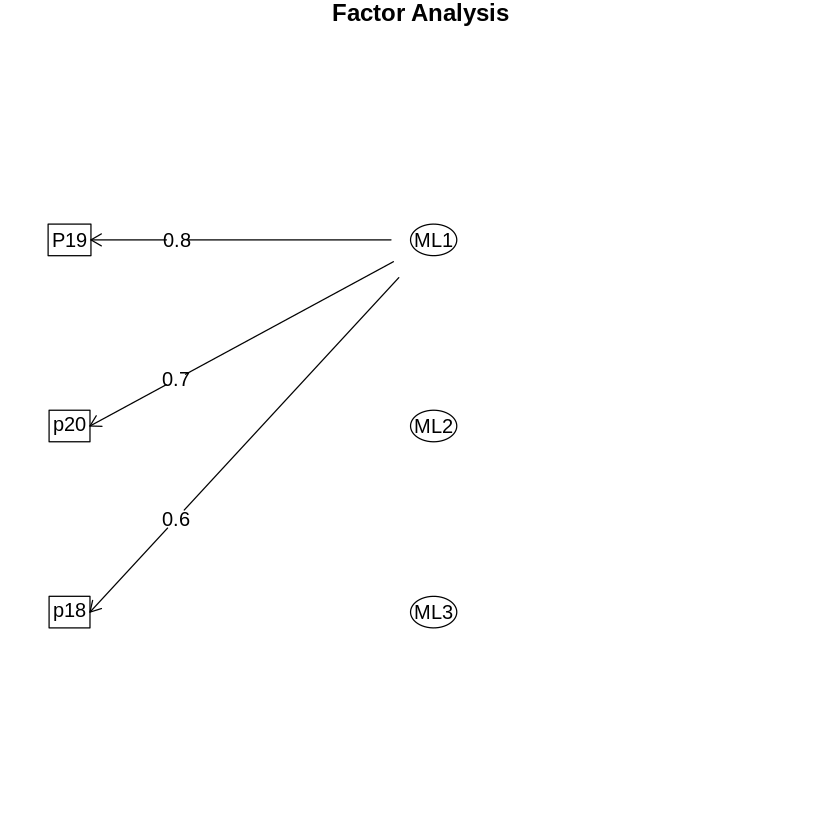

In [98]:
fa.diagram(poly_model_FM)

# Formación minimalista

In [100]:
names(data_LD)=c('p25','P26','p37','p38','p39','p40','p41','p42')
des_LD = describe(data_LD)

In [101]:
knitr::kable(des_LD[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p25 |   1|   4| 2.891089|      3| -0.6016303| -0.2064549|
|P26 |   1|   4| 3.544554|      4| -1.7465161|  2.2876762|
|p37 |   1|   4| 3.475248|      4| -1.2865060|  1.6673820|
|p38 |   1|   4| 3.297030|      3| -0.9259637|  0.2213116|
|p39 |   1|   4| 3.485149|      4| -1.1636441|  0.4968490|
|p40 |   1|   4| 3.386139|      3| -0.8277772|  0.2775274|
|p41 |   1|   4| 3.217822|      3| -0.6504721| -0.1485157|
|p42 |   1|   4| 3.346535|      4| -1.0856894|  0.1450966|

In [102]:
poly_cor_LD = polychoric(data_LD)
rho_LD = poly_cor_LD$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_LD$tau

,1,2,3
p25,-1.346263,-0.6513021,0.71396710
P26,-1.755301,-1.2323409,-0.50456929
p37,-2.057856,-1.4809727,-0.16202378
p38,-1.885177,-1.0428242,0.06208512
p39,-2.330079,-1.2323409,-0.26361161
p40,-2.330079,-1.3462627,0.03723576
p41,-2.057856,-1.0009899,0.26361161
p42,-1.755301,-0.9221782,-0.16202378


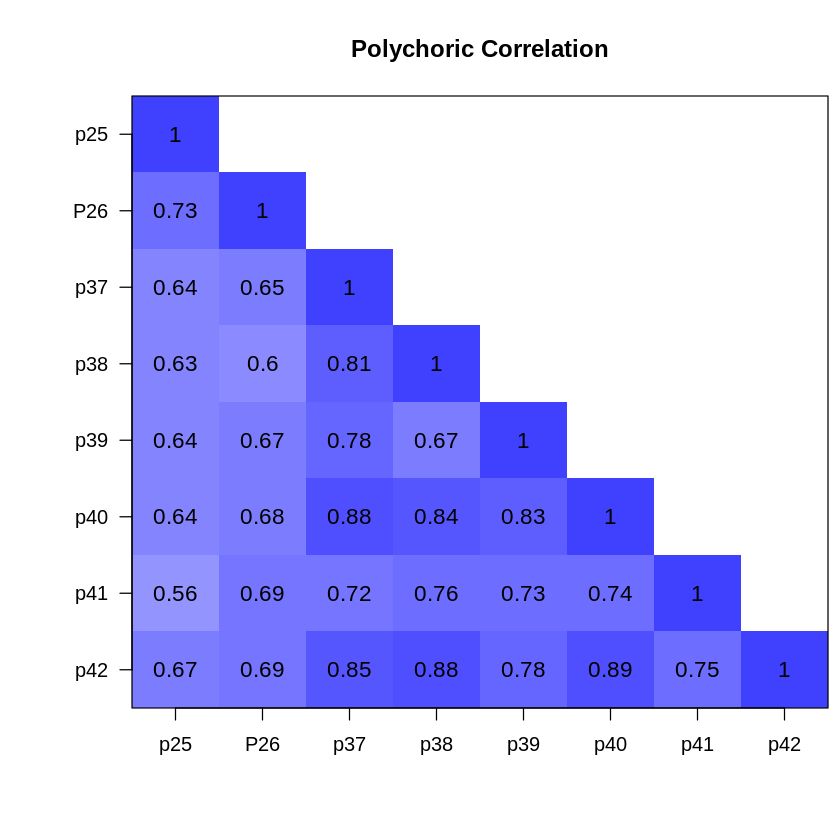

In [103]:
cor.plot(rho_LD, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

In [104]:
KMO(rho_LD)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_LD)
Overall MSA =  0.89
MSA for each item = 
 p25  P26  p37  p38  p39  p40  p41  p42 
0.87 0.87 0.95 0.85 0.88 0.89 0.88 0.93 

Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


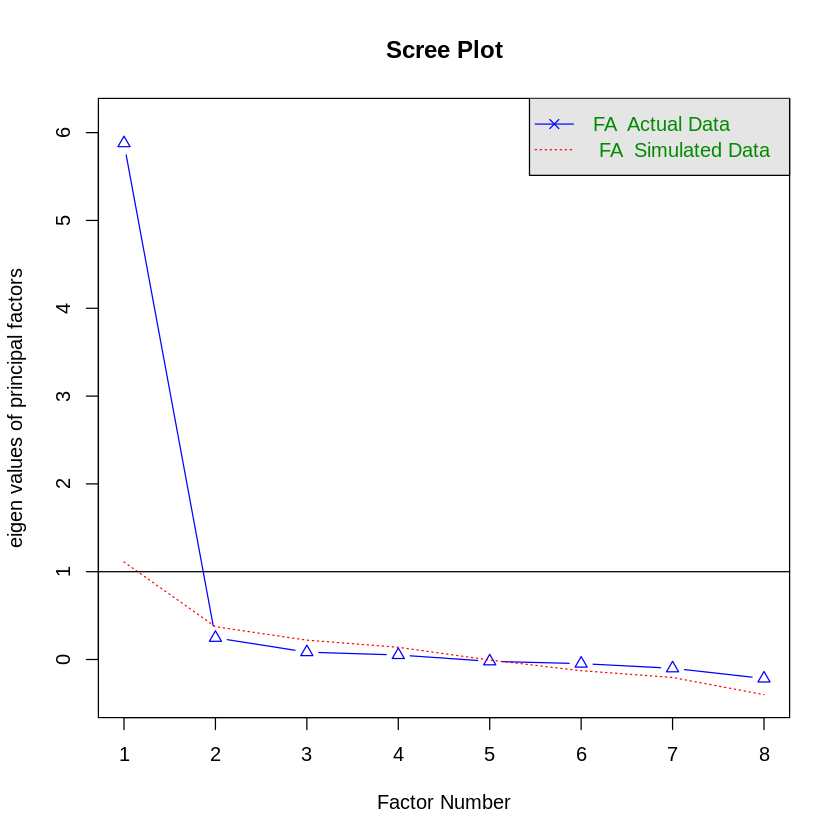

In [105]:
fa.parallel(rho_LD, fm="pa", fa="fa", main = "Scree Plot",n.iter=1,n.obs=102)

## Caso 1 cluster.

In [106]:
# Polychoric factor analysis
poly_model_LD = fa(data_FM, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1  
p18 0.564
P19 0.997
p20 0.635

                 ML1
SS loadings    1.717
Proportion Var 0.572

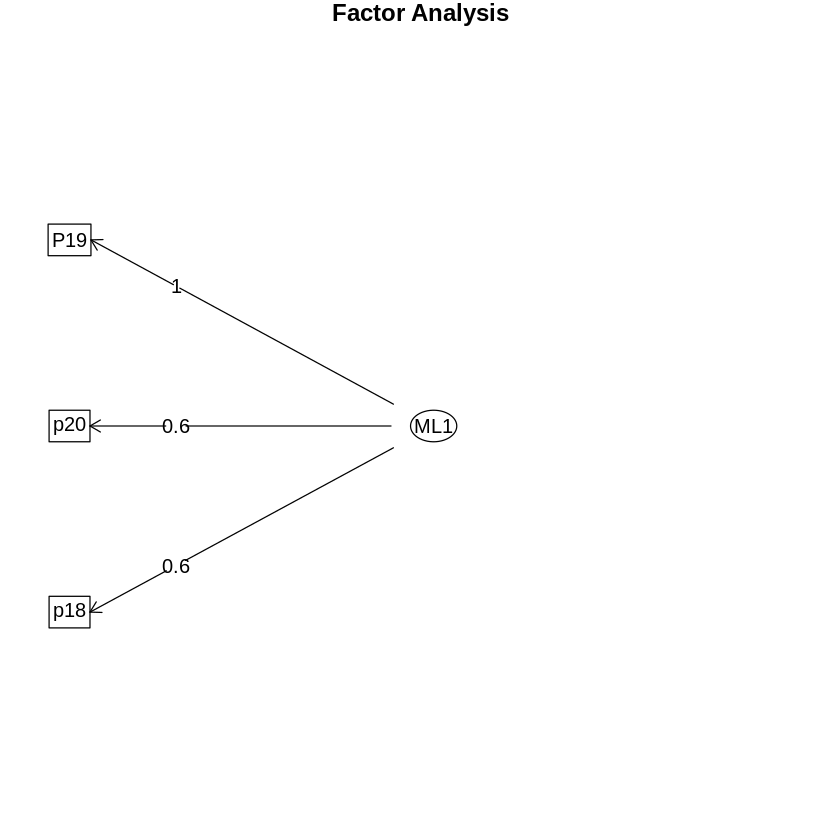

In [107]:
fa.diagram(poly_model_LD)

## Caso 2 clusters.

In [108]:
# Polychoric factor analysis
poly_model_LD = fa(data_FM, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML2   
p18  0.653  0.422
P19  0.858       
p20  0.741 -0.331

                 ML1   ML2
SS loadings    1.712 0.288
Proportion Var 0.571 0.096
Cumulative Var 0.571 0.667

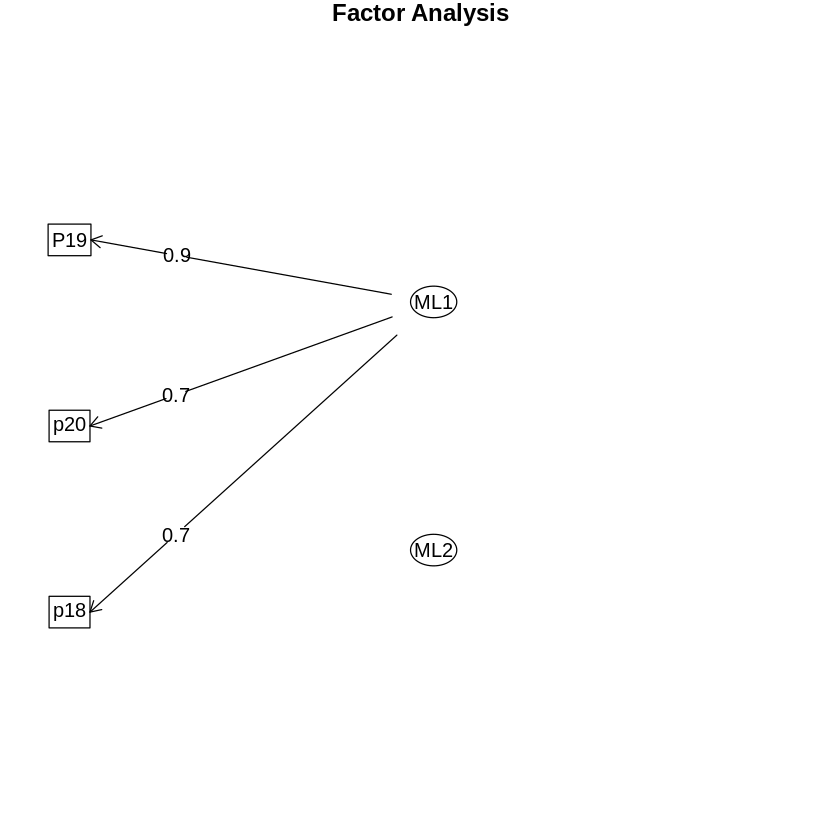

In [109]:
fa.diagram(poly_model_LD)

## Caso 3 clusters.

In [110]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML3    ML2   
p25  0.759        -0.127
P26  0.886        -0.459
p37  0.832  0.336  0.183
p38  0.901         0.426
p39  0.762  0.462       
p40  0.870  0.366  0.174
p41  0.817  0.105       
p42  0.890  0.224  0.212

                 ML1   ML3   ML2
SS loadings    5.661 0.527 0.521
Proportion Var 0.708 0.066 0.065
Cumulative Var 0.708 0.773 0.839

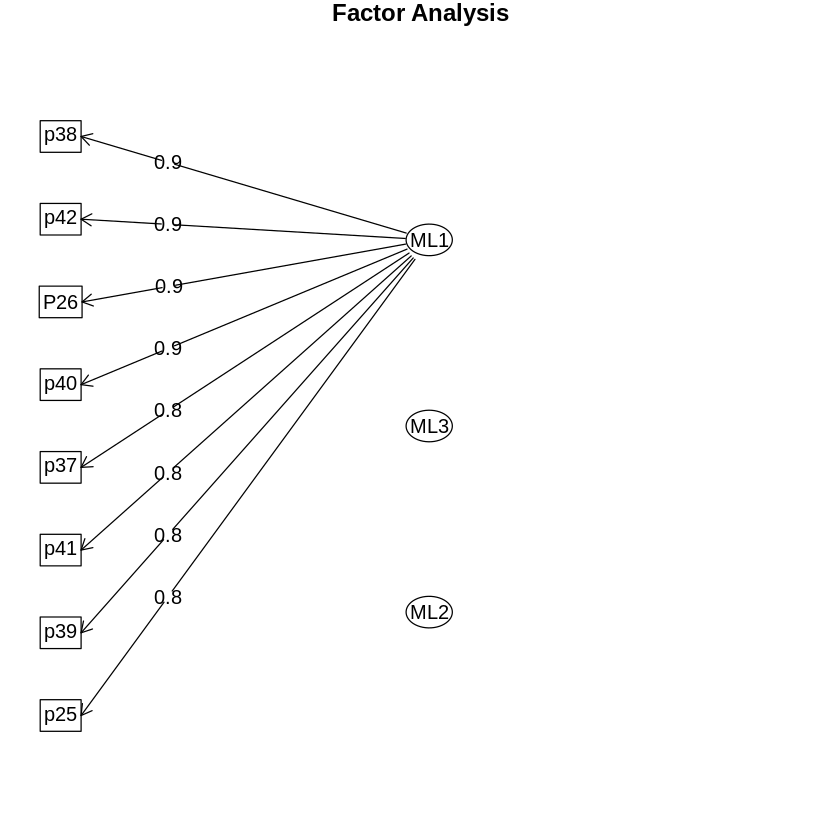

In [111]:
fa.diagram(poly_model_LD)

## Caso 4 clusters.

In [112]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=4, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML4    ML2    ML3   
p25  0.818        -0.566       
P26  0.770  0.147 -0.153 -0.204
p37  0.843  0.319         0.121
p38  0.918         0.171  0.350
p39  0.788  0.407        -0.119
p40  0.862  0.412         0.151
p41  0.886         0.335 -0.312
p42  0.891  0.232         0.180

                 ML1   ML4   ML2   ML3
SS loadings    5.756 0.514 0.503 0.351
Proportion Var 0.720 0.064 0.063 0.044
Cumulative Var 0.720 0.784 0.847 0.891

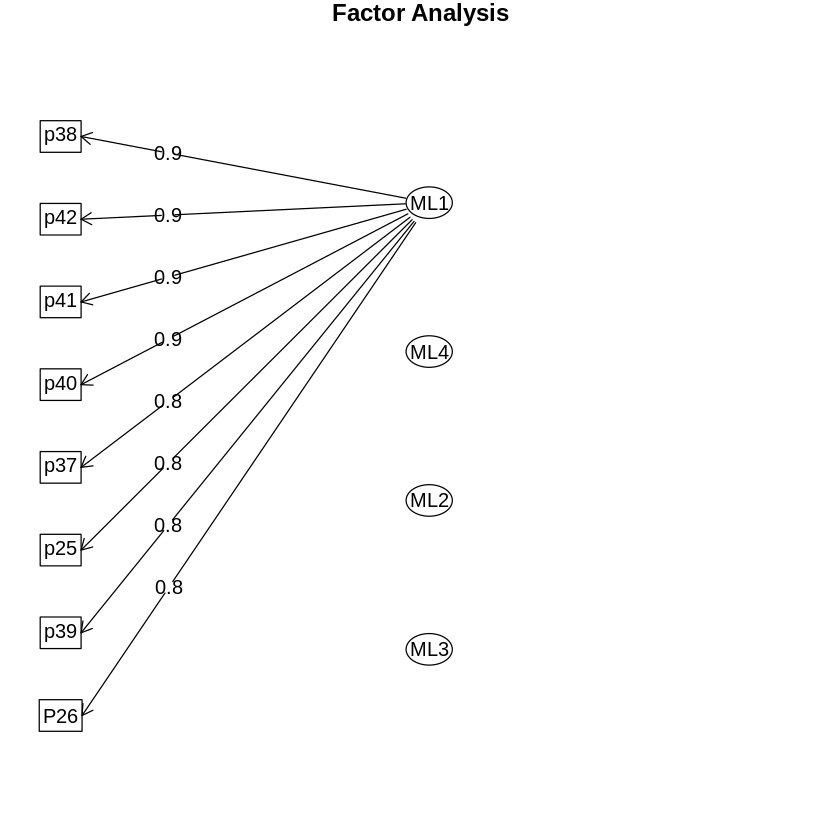

In [113]:
fa.diagram(poly_model_LD)